In [1]:
import pandas as pd
import numpy as np
from src import pre_process
from src import denseNet2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

# 0. Data and instantiating
train_generator, validation_generator = pre_process.image_generator()

Found 588 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [2]:
dense_net_model = denseNet2.YourDenseNetModel()

dense_net_model.build_densenet_model()

dense_net_model.set_generators(train_generator, validation_generator)

In [3]:
# 1. Fitting the model
history = dense_net_model.train(train_x, epochs=3, batch_size=32)

training_loss = history.history['loss']
print("The training loss is of:", training_loss)
validation_loss = history.history['val_loss']
print("The validation loss is of:",validation_loss)
training_accuracy = history.history['accuracy']
print("The training accuracy is of:", training_accuracy)
validation_accuracy = history.history['val_accuracy']
print("The validation accuracy is of:", validation_accuracy)


dense_net_model.get_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

Epoch 1/3
120/120 [==============================] - 11592s 97s/step - loss: 1.0155 - accuracy: 0.7177 - val_loss: 0.6550 - val_accuracy: 0.7170 - lr: 0.0010
The training loss is of: [1.0154920816421509]
The validation loss is of: [0.6550248265266418]
The training accuracy is of: [0.7176870703697205]
The validation accuracy is of: [0.7169811129570007]


In [4]:
# 2. Evaluating the model
batch_size = 32
evaluation_result = dense_net_model.evaluation(batch_size)
print("Evaluation Result:", evaluation_result)

class_names = [0, 1]
dense_net_model.predict_densenet(class_names)

32/32 [==============================] - 2118s 68s/step - loss: 0.6550 - accuracy: 0.7170
Evaluation Result: [0.6550247669219971, 0.7169811129570007]
1/1 [==============================] - 0s 167ms/step


`Predict on new images:`

In [5]:
# 3. Predicting on new data
dense_net_model.load_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

In [6]:
# Image preprocessing

test_path = ["D:/bootcamp/test/006388_0.tif","D:/bootcamp/test/008e5c_0.tif", "D:/bootcamp/test/00c058_0.tif", "D:/bootcamp/test/01adc5_0.tif"]

preprocessed_images = []
for img_path in test_path:
    img = image.load_img(img_path, target_size=(500, 500))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    preprocessed_images.append(img_array)

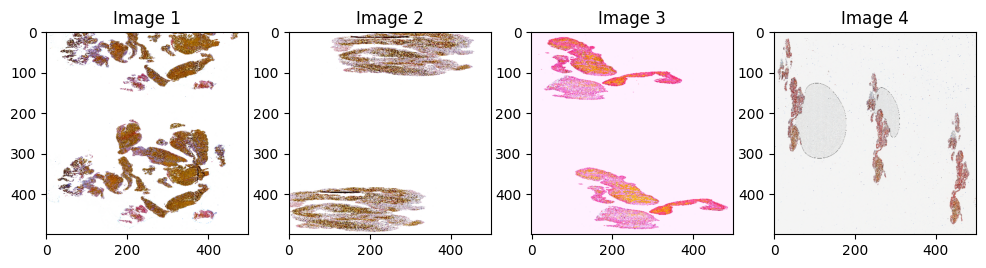

In [7]:
fig, axes = plt.subplots(1, len(test_path), figsize=(12, 4))

for i, img_path in enumerate(test_path):
    img = image.load_img(img_path, target_size=(500, 500))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Plot the preprocessed image
    axes[i].imshow(img_array[0])
    axes[i].set_title(f'Image {i+1}')

plt.show()


In [8]:
class_names = [0,1]
for img in preprocessed_images:
    predictions = dense_net_model.predict_on_data(img, class_names)
    print(predictions)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/flatten/Reshape' defined at (most recent call last):
    File "c:\Users\saraa\miniconda3\envs\final\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\saraa\miniconda3\envs\final\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance
      app.start()
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\kernelapp.py", line 737, in start
      self.io_loop.start()
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\saraa\miniconda3\envs\final\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\saraa\miniconda3\envs\final\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\saraa\miniconda3\envs\final\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell
      await result
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\saraa\AppData\Local\Temp\ipykernel_18048\1124327488.py", line 3, in <module>
      predictions = dense_net_model.predict_on_data(img, class_names)
    File "c:\Users\saraa\Final-IRONHACK-Project\src\denseNet2.py", line 97, in predict_on_data
      predicted_batch = self.model.predict(processed_images)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/flatten/Reshape'
Input to reshape is a tensor with 270848 values, but the requested shape requires a multiple of 476288
	 [[{{node sequential/flatten/Reshape}}]] [Op:__inference_predict_function_2335]